In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile


# Importing Dataset

In [2]:
zip_file_path = r'/content/drive/MyDrive/Uplift Datasets/Global Coffee Health Dataset.zip'
file_folder_path = r'/content/drive/MyDrive/Uplift Datasets'

In [3]:
with zipfile.ZipFile(zip_file_path) as zip_ref:
    zip_ref.extractall(file_folder_path)

In [2]:
file_path = r'/content/drive/MyDrive/Uplift Datasets/synthetic_coffee_health_10000.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [4]:
df.tail()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0
9999,10000,42,Female,Brazil,2.9,277.5,6.4,Good,28.1,72,Low,9.8,NaN,Student,1,0


# Data Sanity Check

In [5]:
df.shape


(10000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [7]:
# Finding missing value

df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [8]:
# Finding the percentage of missing value

df.isnull().sum()/df.shape[0]*100

,0
ID,0.00
Age,0.00
Gender,0.00
Country,0.00
Coffee_Intake,0.00
Caffeine_mg,0.00
Sleep_Hours,0.00
Sleep_Quality,0.00
BMI,0.00
Heart_Rate,0.00


In [9]:
# Finding duplicates

df.duplicated().sum()

np.int64(0)

In [10]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues',
       'Occupation'],
      dtype='object')

In [11]:
# Identifying garbage value

for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
******************************
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
******************************
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
******************************
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
******************************
Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
******************************
Occupation
Office        2073
Other         2038
Student       196

# Exploratory Data Analysis

In [12]:
# Descriptive statistics

df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [13]:
df.describe(include='object')

,Gender,Country,Sleep_Quality,Stress_Level,Health_Issues,Occupation
count,10000,10000,10000,10000,4059,10000
unique,3,20,4,3,3,5
top,Female,Canada,Good,Low,Mild,Office
freq,5001,543,5637,6989,3579,2073


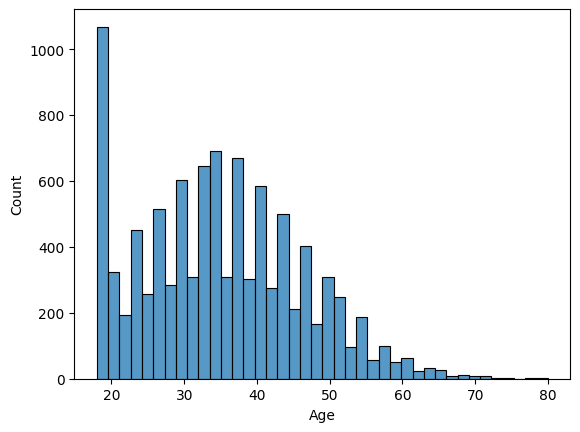

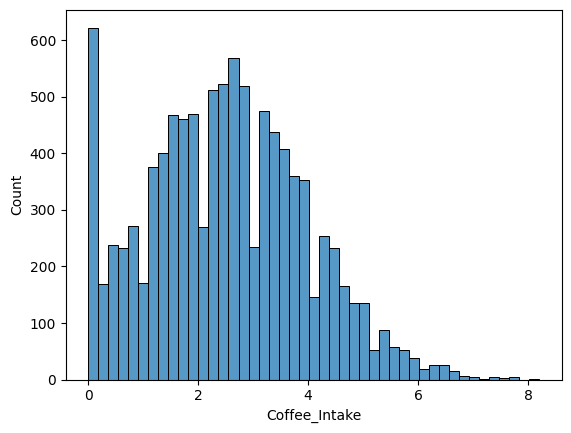

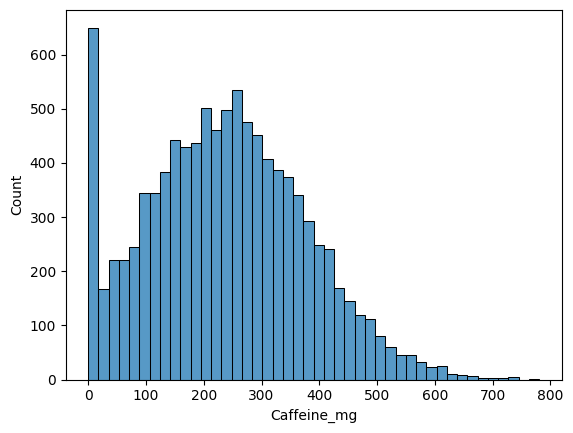

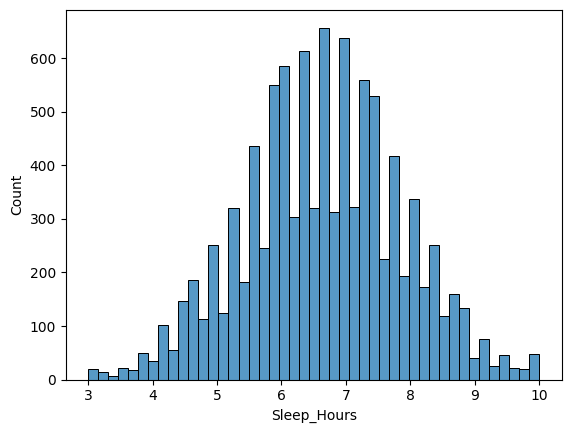

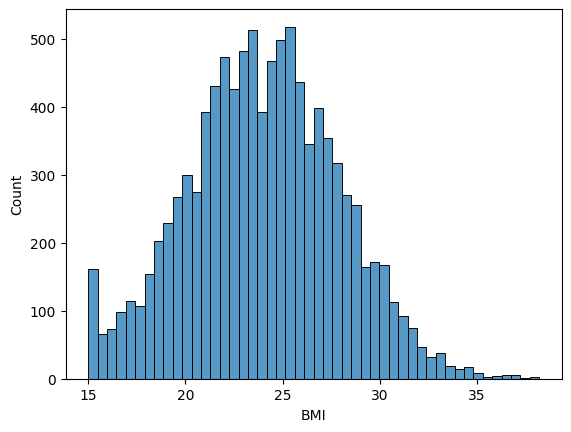

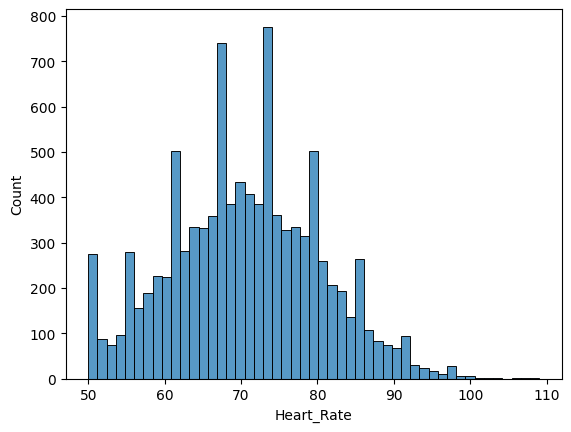

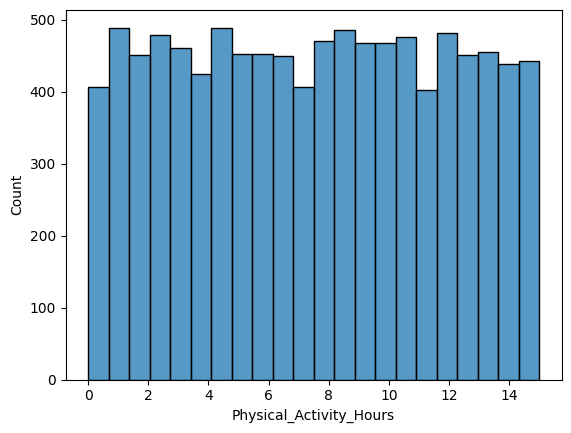

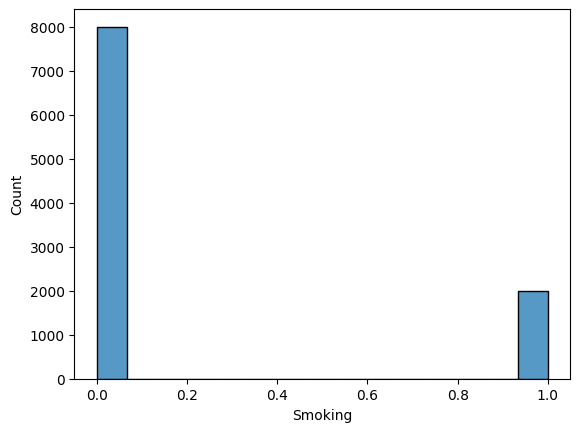

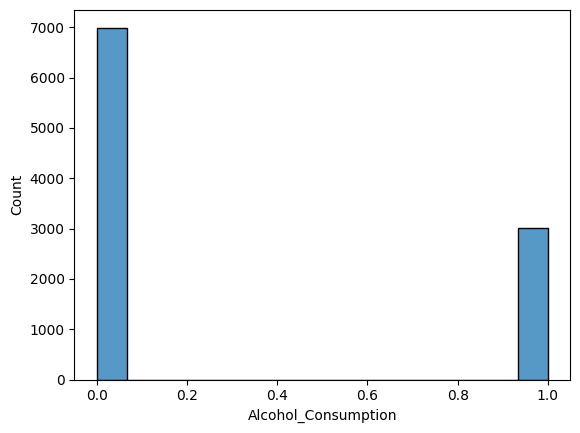

In [14]:
# Histogram to understand the distribution

for i in df.select_dtypes(include='number').drop(columns='ID').columns:
  sns.histplot(data=df, x=i)
  plt.show()

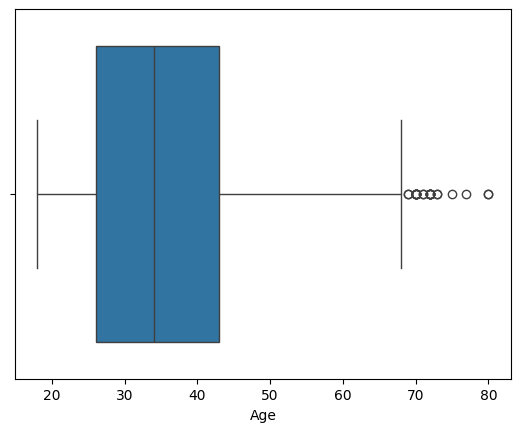

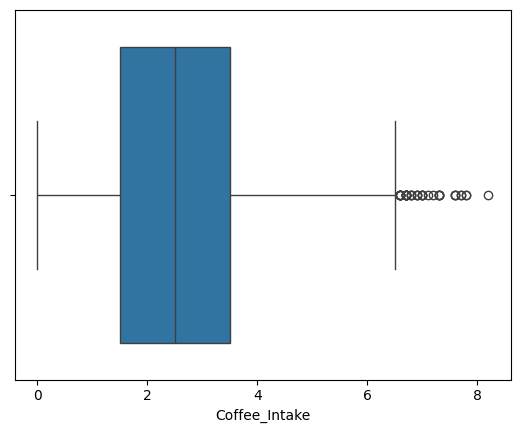

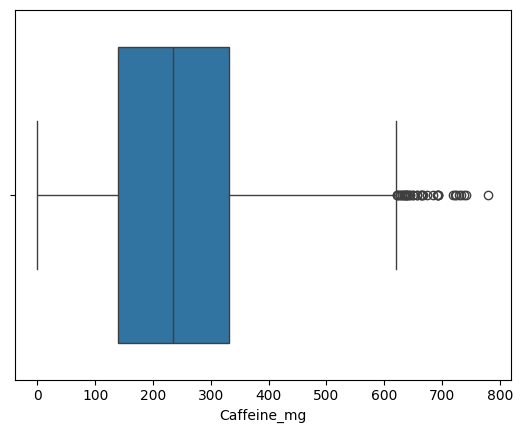

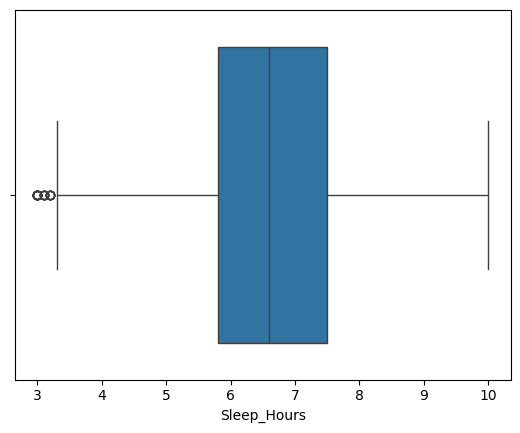

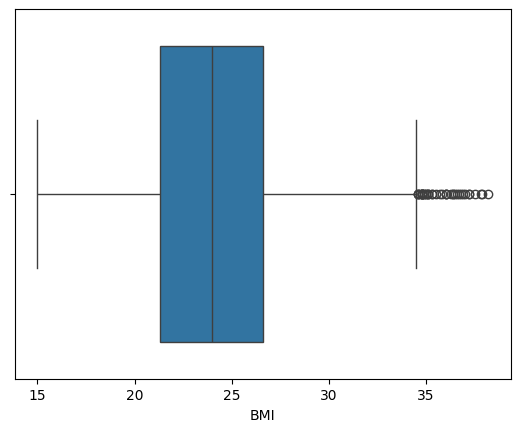

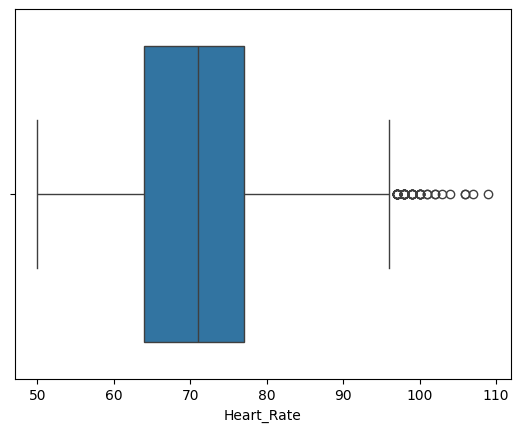

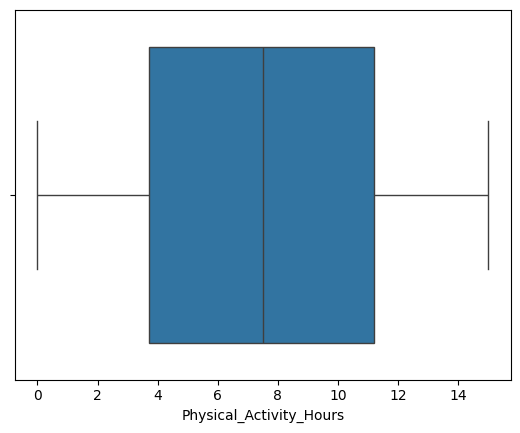

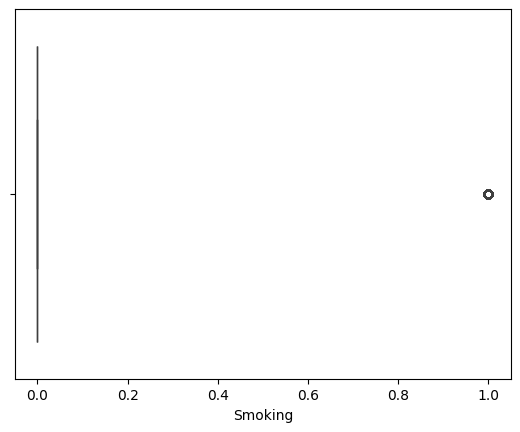

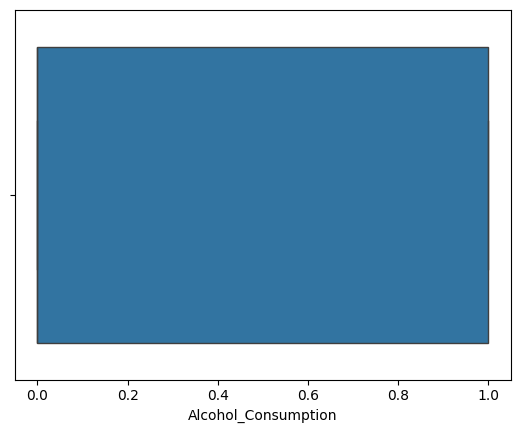

In [14]:
# Boxplot to identify outliers

for i in df.select_dtypes(include='number').drop(columns='ID').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [15]:
df.select_dtypes(include='number').drop(columns='ID').columns

Index(['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI',
       'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

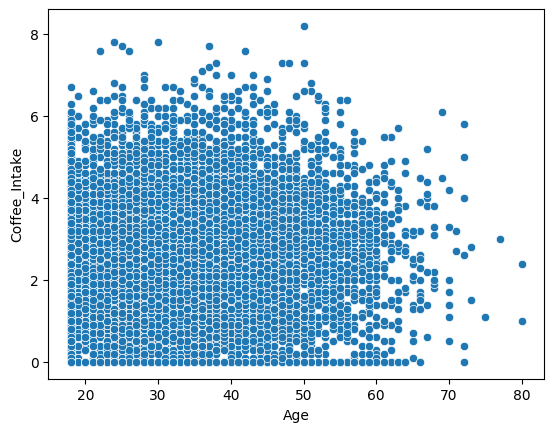

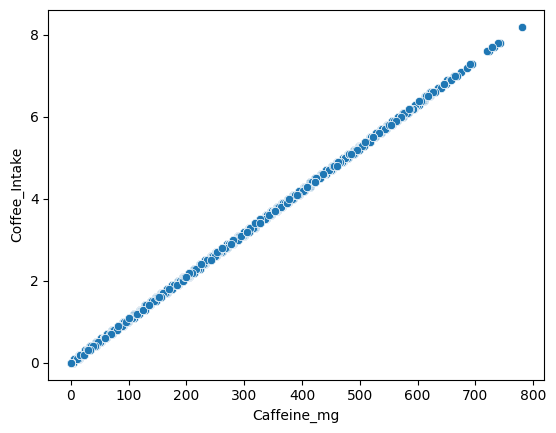

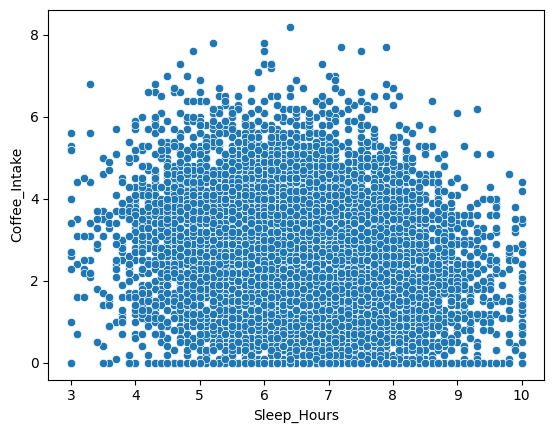

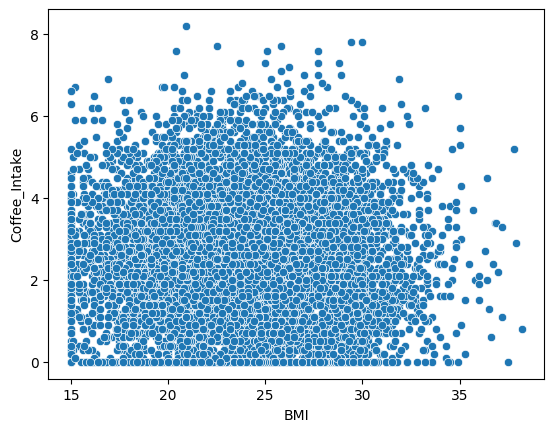

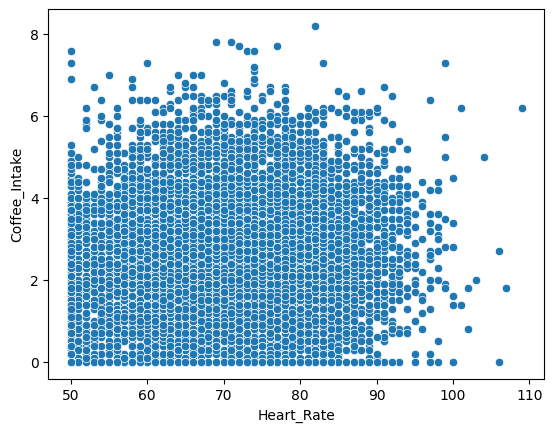

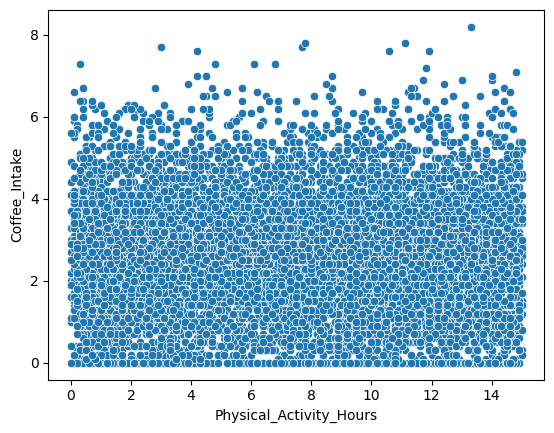

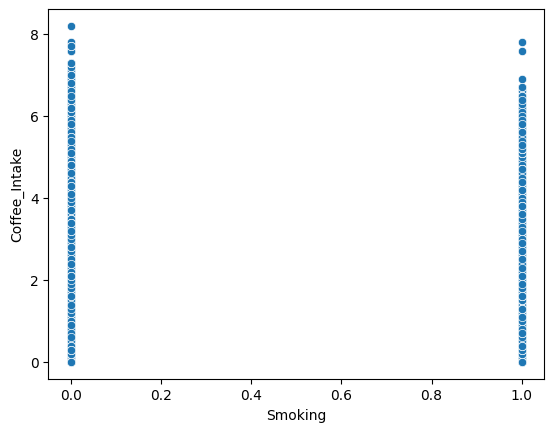

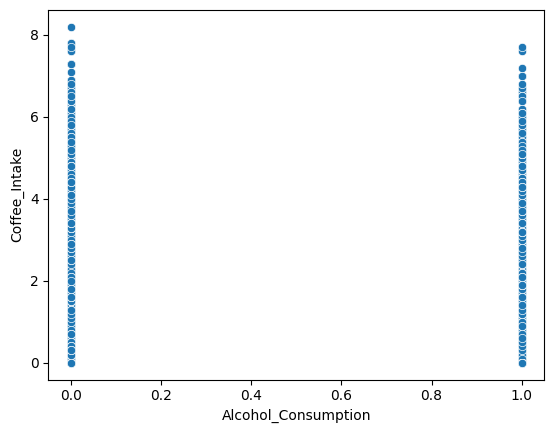

In [16]:
# Scatter plot to understand relationship

for i in ['Age', 'Caffeine_mg', 'Sleep_Hours', 'BMI',
       'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
       'Alcohol_Consumption']:
  sns.scatterplot(data=df, x=i, y='Coffee_Intake')
  plt.show()

In [17]:
# Correlation with heatmap to interpret the relation and multicolliniarity

df.select_dtypes(include='number').corr()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
ID,1.000000,-0.008814,-0.005573,-0.005782,-0.010274,-0.010905,-0.002129,-0.007624,0.000291,-0.000143
Age,-0.008814,1.000000,-0.012155,-0.011797,0.005010,0.008627,-0.000197,0.005931,-0.013565,0.000998
Coffee_Intake,-0.005573,-0.012155,1.000000,0.999814,-0.190291,-0.008330,0.060123,0.004782,0.010836,-0.007798
Caffeine_mg,-0.005782,-0.011797,0.999814,1.000000,-0.190493,-0.008706,0.060027,0.005026,0.010829,-0.008018
Sleep_Hours,-0.010274,0.005010,-0.190291,-0.190493,1.000000,0.008463,-0.036219,-0.011228,0.007955,-0.003375
BMI,-0.010905,0.008627,-0.008330,-0.008706,0.008463,1.000000,-0.009362,0.002042,0.015319,-0.006537
Heart_Rate,-0.002129,-0.000197,0.060123,0.060027,-0.036219,-0.009362,1.000000,-0.002919,0.006534,-0.009474
Physical_Activity_Hours,-0.007624,0.005931,0.004782,0.005026,-0.011228,0.002042,-0.002919,1.000000,-0.007314,-0.019156
Smoking,0.000291,-0.013565,0.010836,0.010829,0.007955,0.015319,0.006534,-0.007314,1.000000,-0.011769
Alcohol_Consumption,-0.000143,0.000998,-0.007798,-0.008018,-0.003375,-0.006537,-0.009474,-0.019156,-0.011769,1.000000


<Axes: >

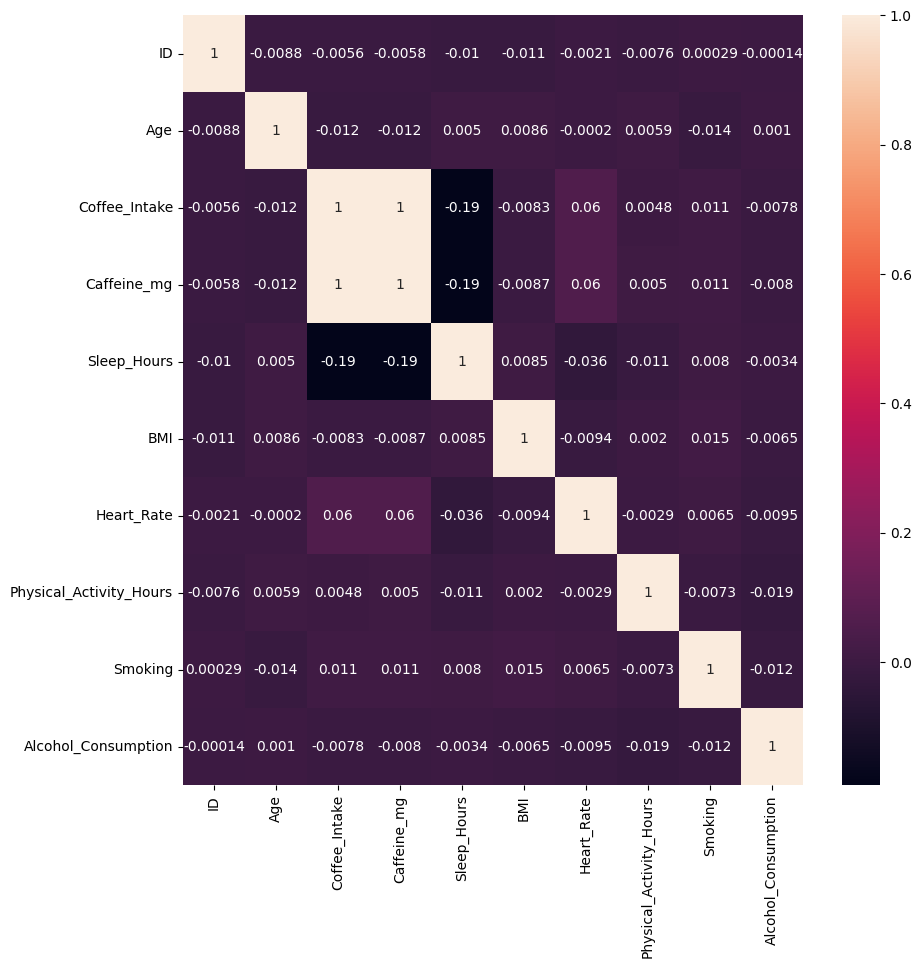

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# Missing Value Treatments

In [19]:
# It was assumed that null values means no known health issues

df['Health_Issues'] = df['Health_Issues'].fillna('No known health issues')

In [20]:
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,No known health issues,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,No known health issues,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,No known health issues,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,No known health issues,Student,0,0


In [21]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


# Create Train and Test Set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
train_set

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
9254,9255,37,Male,Spain,4.3,405.6,5.4,Fair,18.0,86,Medium,2.4,Mild,Service,0,1
1561,1562,26,Male,India,0.0,0.0,5.5,Fair,28.3,75,Medium,10.8,Mild,Other,0,0
1670,1671,32,Male,South Korea,2.8,268.1,7.3,Good,27.4,69,Low,8.6,No known health issues,Office,0,0
6087,6088,18,Male,South Korea,2.2,208.6,8.1,Excellent,16.3,83,Low,8.9,No known health issues,Other,0,1
6669,6670,43,Female,UK,2.6,251.1,9.4,Excellent,25.4,68,Low,3.4,No known health issues,Office,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,28,Other,Brazil,1.4,130.7,4.6,Poor,25.1,64,High,11.3,Mild,Other,0,0
5191,5192,34,Female,China,0.0,0.0,6.2,Good,22.3,73,Low,7.9,No known health issues,Office,0,0
5390,5391,26,Male,Mexico,4.4,418.3,5.2,Fair,18.5,71,Medium,10.1,Mild,Other,0,0
860,861,37,Female,USA,0.3,29.8,9.1,Excellent,18.8,74,Low,0.6,No known health issues,Office,0,0


In [26]:
test_set

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
6252,6253,66,Male,Norway,2.6,245.9,6.7,Good,30.1,76,Low,1.9,Moderate,Service,0,1
4684,4685,22,Female,Mexico,3.1,293.1,7.6,Good,20.4,69,Low,5.0,No known health issues,Service,0,0
1731,1732,30,Male,Australia,3.9,372.4,6.4,Good,27.5,75,Low,13.8,No known health issues,Office,0,0
4742,4743,35,Male,Germany,1.0,92.5,5.3,Fair,23.1,71,Medium,2.4,Mild,Service,0,0
4521,4522,47,Male,Italy,1.3,119.0,6.9,Good,28.4,64,Low,9.6,No known health issues,Office,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,6413,18,Female,USA,0.5,44.1,7.2,Good,22.1,68,Low,8.1,No known health issues,Healthcare,0,0
8285,8286,46,Female,China,2.7,252.5,4.5,Poor,27.4,72,High,14.9,Mild,Healthcare,1,0
7853,7854,41,Female,China,2.7,260.4,8.3,Excellent,18.5,74,Low,4.1,No known health issues,Student,0,1
1095,1096,34,Female,Norway,3.9,373.4,7.6,Good,30.8,82,Low,1.1,Mild,Service,0,1


# Split training data into x and y variables

In [27]:
x_train = train_set.drop('BMI', axis=1)
y_train = train_set['BMI']

# Transform data for ML computaions

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_ordinal_cols = ['Sleep_Quality', 'Stress_Level']
cat_1hot_cols = ['Gender', 'Country', 'Occupation', 'Health_Issues']

x_trans_pipeline = ColumnTransformer([
    ('cat_1hot', OrdinalEncoder(handle_unknown='error'), cat_ordinal_cols),
    ('cat_ordinal', OneHotEncoder(handle_unknown='ignore'), cat_1hot_cols)

])

x_train_trans = x_trans_pipeline.fit_transform(x_train)
x_train_trans

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 46150 stored elements and shape (8000, 34)>

# Model Training

In [31]:
# Training the Decision Tree Model
from sklearn import tree
decision_model = tree.DecisionTreeRegressor()
decision_model = decision_model.fit(x_train_trans, y_train)

# Training the Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model = linear_model.fit(x_train_trans, y_train)

# Training the Support Vector Regressor
from sklearn import svm
reger_model = svm.SVR()
reger_model = reger_model.fit(x_train_trans, y_train)

# Training the Neural Network Model
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(random_state=42, max_iter=500)
nn_model.fit(x_train_trans, y_train)

# Training the Kernel Ridge Regression Model
from sklearn.kernel_ridge import KernelRidge
krr_model = KernelRidge(alpha=1.0)
krr_model.fit(x_train_trans, y_train)

KernelRidge(alpha=1.0)

# Testing

In [32]:
# Transform the test set
x_test = test_set.drop('BMI', axis=1)
y_test = test_set['BMI']

# Transform the data for ML computations
cat_ordinal_cols = ['Sleep_Quality', 'Stress_Level']
cat_1hot_cols = ['Gender', 'Country', 'Occupation', 'Health_Issues']

y_trans_pipeline = ColumnTransformer([
    ('cat_1hot', OrdinalEncoder(handle_unknown='error'), cat_ordinal_cols),
    ('cat_ordinal', OneHotEncoder(handle_unknown='ignore'), cat_1hot_cols)

])

x_test_trans = y_trans_pipeline.fit_transform(x_test)
x_test_trans

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11537 stored elements and shape (2000, 34)>

In [33]:
# Make predictions on the test set
decision_model_predicitions = decision_model.predict(x_test_trans)
linear_model_predicitions = linear_model.predict(x_test_trans)
reger_model_prediction = reger_model.predict(x_test_trans)
nn_model_predictions = nn_model.predict(x_test_trans)
krr_model_predictions = krr_model.predict(x_test_trans)

In [34]:
# Measure model performance
from sklearn.metrics import mean_absolute_percentage_error

decision_error = mean_absolute_percentage_error(y_test, decision_model_predicitions)
linear_error = mean_absolute_percentage_error(y_test, linear_model_predicitions)
reger_error = mean_absolute_percentage_error(y_test, reger_model_prediction)
nn_error = mean_absolute_percentage_error(y_test, nn_model_predictions)
krr_error = mean_absolute_percentage_error(y_test, krr_model_predictions)

In [35]:
print(f'Decision Tree Error {decision_error}')
print(f'Linear Regression Error {linear_error}')
print(f"SVR Error: {reger_error}")
print(f"Neural Network Error: {nn_error}")
print(f"Kernel Ridge Regression Error: {krr_error}")

Decision Tree Error 0.14235020733266154
Linear Regression Error 0.13056736254491427
SVR Error: 0.131183671584389
Neural Network Error: 0.1342710422520152
Kernel Ridge Regression Error: 0.13049683476828067


In [36]:
# Appeding the predictions in the data set.
test_set['BMI Predictions (Linear Model)'] = linear_model_predicitions
test_set['BMI Predictions (Decision Tree Model)'] = decision_model_predicitions
test_set['BMI Predictions (SVR Model)'] = reger_model_prediction
test_set['BMI Predictions (Neural Network Model)'] = nn_model_predictions
test_set['BMI Predictions (Kernel Ridge Regression Model)'] = krr_model_predictions
test_set

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,...,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,BMI Predictions (Linear Model),BMI Predictions (Decision Tree Model),BMI Predictions (SVR Model),BMI Predictions (Neural Network Model),BMI Predictions (Kernel Ridge Regression Model)
6252,6253,66,Male,Norway,2.6,245.9,6.7,Good,30.1,76,...,1.9,Moderate,Service,0,1,27.101098,30.500000,29.688261,26.625171,27.072240
4684,4685,22,Female,Mexico,3.1,293.1,7.6,Good,20.4,69,...,5.0,No known health issues,Service,0,0,23.375580,21.771429,23.417321,22.497655,23.386620
1731,1732,30,Male,Australia,3.9,372.4,6.4,Good,27.5,75,...,13.8,No known health issues,Office,0,0,23.535805,22.906667,23.500263,22.554995,23.550800
4742,4743,35,Male,Germany,1.0,92.5,5.3,Fair,23.1,71,...,2.4,Mild,Service,0,0,23.632315,22.041667,23.299887,22.016953,23.650100
4521,4522,47,Male,Italy,1.3,119.0,6.9,Good,28.4,64,...,9.6,No known health issues,Office,1,0,23.382227,23.263636,23.307310,22.632201,23.394510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,6413,18,Female,USA,0.5,44.1,7.2,Good,22.1,68,...,8.1,No known health issues,Healthcare,0,0,23.334346,23.180952,23.267664,22.679993,23.343565
8285,8286,46,Female,China,2.7,252.5,4.5,Poor,27.4,72,...,14.9,Mild,Healthcare,1,0,24.366897,23.700000,22.746024,23.134784,24.341826
7853,7854,41,Female,China,2.7,260.4,8.3,Excellent,18.5,74,...,4.1,No known health issues,Student,0,1,23.836842,23.860000,23.534937,23.865814,23.791254
1095,1096,34,Female,Norway,3.9,373.4,7.6,Good,30.8,82,...,1.1,Mild,Service,0,1,24.120380,29.433333,26.361801,27.792524,24.117895
